<a href="https://colab.research.google.com/github/ba88052/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
url_train = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/train.csv"
url_test = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

#Day 2 鐵達尼號存活預測 - 建立第一個 Baseline 版本

1. 在你的 Colab 程式碼中載入 `train.csv` 資料集，可以參考這一篇 教學。

In [46]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/train.csv"
url_test = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

2. 請瞭解該資料中所有欄位的定義為何？

Survived: 0 = No 1 = Yes

PassengerId: ID號碼，從1到891號

Sex: 男女生理性別 male= 男 female= 女 （需轉成編碼）

SibSp: 兄弟姊妹或是配偶數量
兄弟姐妹=兄弟，姐妹，繼兄弟，繼妹
配偶=丈夫，妻子（情婦和未婚夫被忽略）

Age: 年歲 年齡小於1時為小數。如果年齡是估計的，是xx.5的形式嗎

Name:名字 可拿掉

Embarked: 登船港口 C = Cherbourg, Q = Queenstown, S = Southampton 需轉成one hot編碼

Fare: 乘客票價

Cabin: 客艙號（有許多遺漏值）

Pclass: 倉位 1 = 1st, 2 = 2nd, 3 = 3rd 

Parch: 父母或孩子
父母=母親，父親
孩子 = 女兒、兒子、繼女、繼子
有些孩子只和保姆一起旅行，因此他們的 parch=0。

Ticket: 船票編號


3. 進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。

In [19]:
#查看資料型態
df_train.describe()
# df_train.describe(include=[object])
# df_train.describe(include='all')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


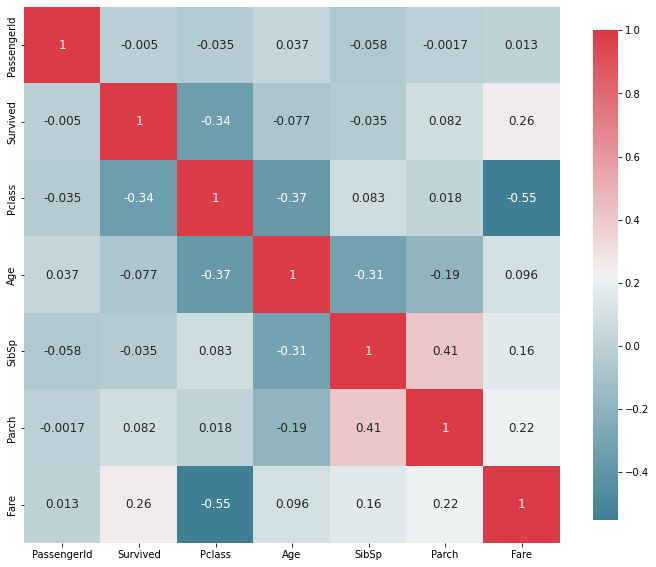

In [3]:
#相關係數熱圖 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

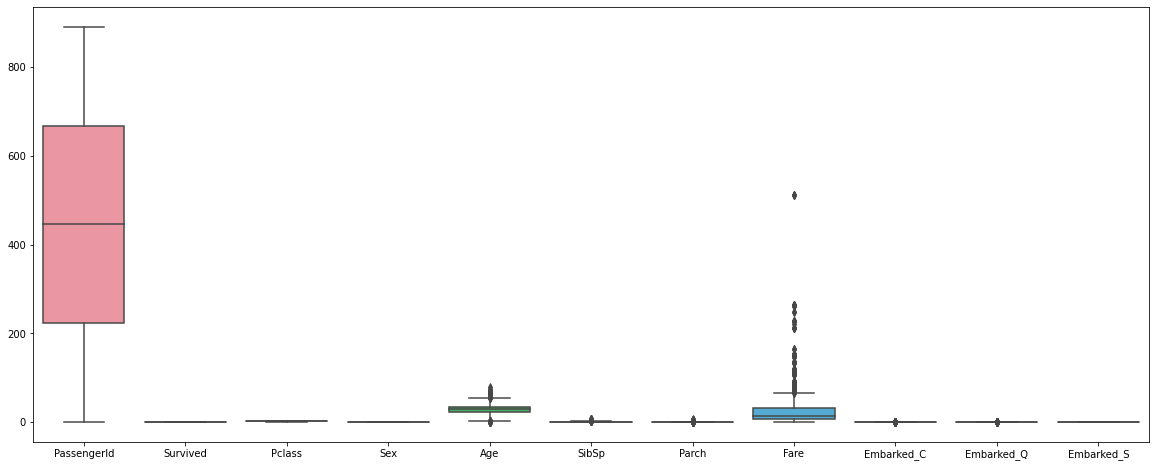

In [ ]:
#箱形圖，查看是否有數據離散程度
plt.figure(figsize = (20, 8))
sns.boxplot(data = df_train, width = 0.8)
plt.show()

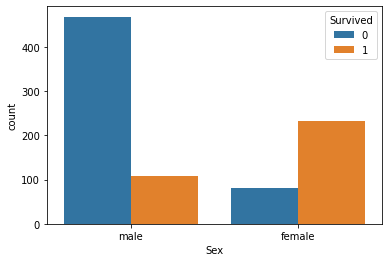

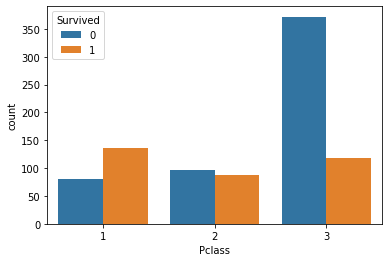

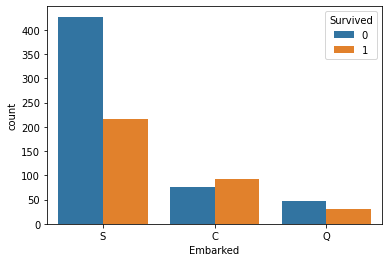

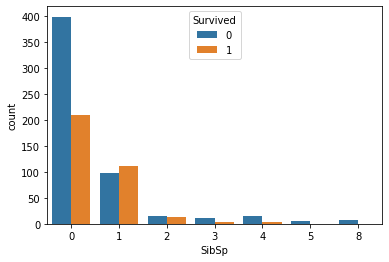

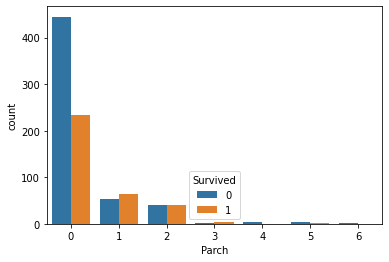

In [35]:
#長條對比圖 性別
import matplotlib.pyplot as plt
import seaborn as sns
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']
for i in selected_cols:
  sns.countplot(x=i ,hue='Survived',data=df_train)
  plt.show()

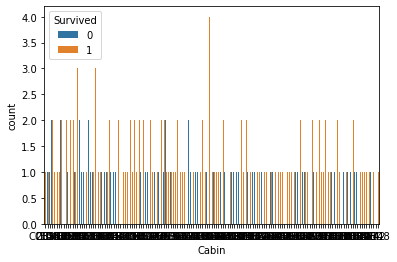

In [14]:
#長條對比圖 Cabin
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Cabin',hue='Survived',data=df_train)

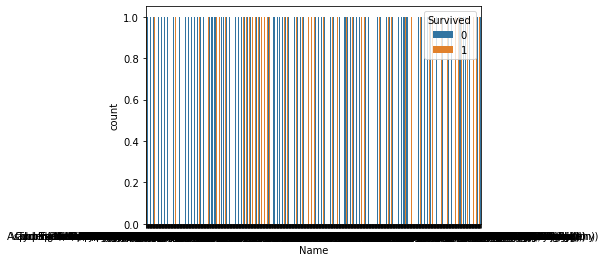

In [15]:
#長條對比圖 Name
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Name',hue='Survived',data=df_train)

4. 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。

In [ ]:
#初步清理資料

#將性別轉成編碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

#將艙等獨熱編碼
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

#Age填上平均值
df_train["Age"].fillna(value = df_train["Age"].mean(), inplace = True)


#刪除姓名、船票編號、客艙號
try:
  df_train = df_train.drop(["Name", "Ticket", "Cabin"],axis=1)
  df_train = df_train.drop("Name",axis=1)
except:
  print("已經修改完成")


5. 最後請將資料接著執行下方範例，看看能否產出結果呢。

In [ ]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores
#random_state：隨機數種子，int類型，可選參數，默認爲無，僅在正則化優化算法爲sag,liblinear時有用。
#max_iter：算法收斂最大迭代次數，int類型，默認爲10。僅在正則化優化算法爲newton-cg, sag和lbfgs纔有用，算法收斂的最大迭代次數。/

array([0.78212291, 0.78651685, 0.78089888, 0.76966292, 0.81460674])

#Day03 鐵達尼號存活預測 - 運用資料與特徵優化分析

1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？

（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

In [20]:
#關係係數比較高，影響比重就比較大


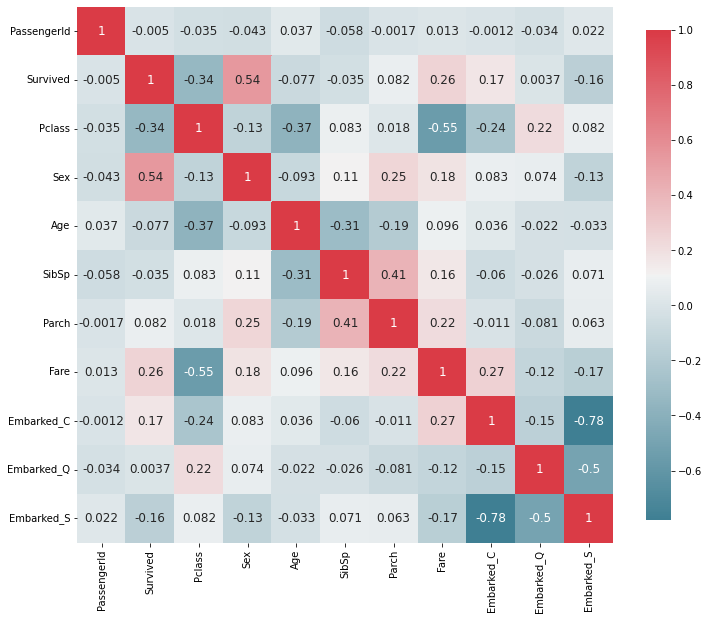

In [21]:
#相關係數熱圖 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

In [25]:
corr["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S    -0.155660
Name: Survived, dtype: float64

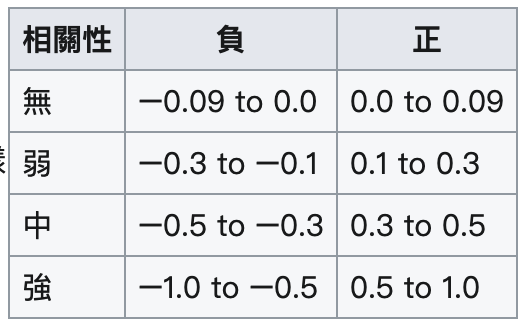

In [26]:
"""
PassengerId   -0.005007
Pclass        -0.338481
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S    -0.155660
"""
#Pclass Sex Fare 和Embarked 在哪登船，影響都比較顯著，至少超過0.1，且sex超過0.5，是其中最顯著的。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

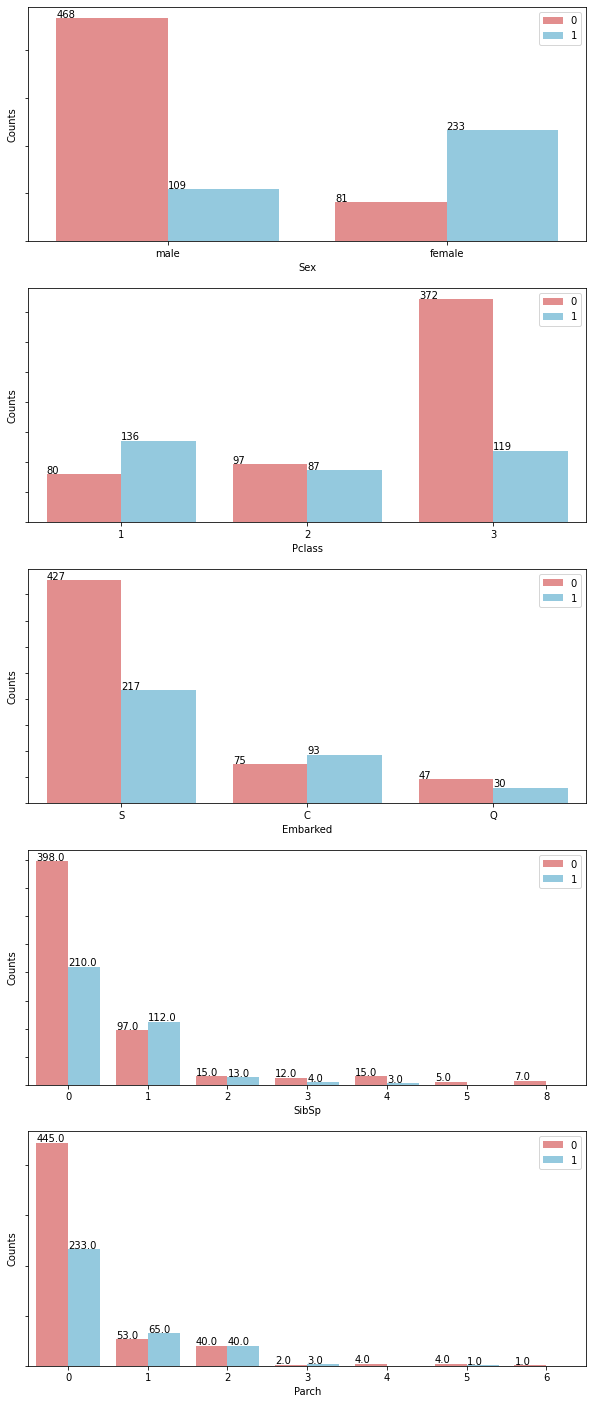

In [37]:
import matplotlib.gridspec as gridspec
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']
plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df_train[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df_train[col], hue=df_train.Survived, palette=['lightcoral','skyblue'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？


本來覺得有很多東西可以移除，但在看了文章後，覺得都好重要qq

但我基本上還是先移除名字、客艙號、船票編號

3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。

In [48]:
#Age填上中位數
df_train["Age"].fillna(value = df_train["Age"].median() , inplace = True)

#Age填上平均值
# df_train["Age"].fillna(value = df_train["Age"].mean(), inplace = True)

4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

In [49]:
#性別進行編碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

#將登船地點獨熱編碼
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

In [50]:
#加入Family_nums欄位（為Parch + SibSp)
df_train["Family_nums"] = df_train["Parch"] + df_train["SibSp"]

In [52]:
#刪除姓名、船票編號、客艙號
try:
  df_train = df_train.drop(["Name", "Ticket", "Cabin"],axis=1)
  df_train = df_train.drop("Name",axis=1)
except:
  print("已經修改完成")
df_train

已經修改完成


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_nums
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1,0
887,888,1,1,1,19.0,0,0,30.0000,0,0,1,0
888,889,0,3,1,28.0,1,2,23.4500,0,0,1,3
889,890,1,1,0,26.0,0,0,30.0000,1,0,0,0


6.最後，請將資料接著執行下方範例，產生新的結果之後並且截圖且存成一次新的 Commit。

In [53]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.78212291, 0.78651685, 0.78651685, 0.76966292, 0.81460674])